In [1]:
import pandas as pd
import numpy as np
import data_describe as dd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Ingest: Read Directly From BigQuery

In [3]:
QUERY = 'SELECT * FROM `data-describe.census_income.adult_data`'

df = pd.read_gbq(QUERY)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:407: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,74141,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,178215,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,86958,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,176012,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


## Data Ingest: Read Directly From Bucket

In [8]:
df = pd.read_csv('gs://amazing-public-data/census_income/census_income_data_adult.data')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Ingest: Copy From Bucket Using gsutil

In [2]:
# Replace <PROJECT_ID>, <BUCKET_ID>, and <FOLDER> with proper Project, Bucket ID, and Folder.
# project = '<PROJECT_ID>'
project='ai-fulcrum-admin'
# bucket = '<BUCKET_ID>'
bucket='maven-user1'
# folder = '<FOLDER>'
folder='census-income'
region='us-central1'

In [3]:
bucket_path=f'{bucket}/{folder}'
%env PROJECT_ID=$project
%env BUCKET_ID=$bucket
%env BUCKET_PATH=$bucket_path
%env REGION=$region
!gsutil mb -c standard -l {region} gs://{bucket}

env: PROJECT_ID=ai-fulcrum-admin
env: BUCKET_ID=maven-user1
env: BUCKET_PATH=maven-user1/census-income
env: REGION=us-central1
Creating gs://maven-user1/...
ServiceException: 409 Bucket maven-user1 already exists.


In [4]:
!pwd

/home/jupyter/awesome-data-science-models/census-income/EDA


In [5]:
# Create a directory to hold the data
! mkdir census_data

# Download the data
!gsutil cp gs://amazing-public-data/census_income/census_income_data_adult.data ./census_data/adult.data
!gsutil cp gs://amazing-public-data/census_income/census_income_data_adult.test ./census_data/adult.test

Copying gs://amazing-public-data/census_income/census_income_data_adult.data...
/ [1 files][  3.8 MiB/  3.8 MiB]                                                
Operation completed over 1 objects/3.8 MiB.                                      
Copying gs://amazing-public-data/census_income/census_income_data_adult.test...
/ [1 files][  1.9 MiB/  1.9 MiB]                                                
Operation completed over 1 objects/1.9 MiB.                                      


In [6]:
df = pd.read_csv('./census_data/adult.data', nrows=1000)

In [7]:
df.shape

(1000, 15)

In [8]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df['income'] = df['income'].map({' <=50K': 0,' >50K': 1})

In [10]:
df['income'].value_counts(normalize=True)

0    0.768
1    0.232
Name: income, dtype: float64

In [11]:
df['workclass'].value_counts()

 Private             698
 Self-emp-not-inc     81
 Local-gov            68
 ?                    62
 State-gov            37
 Self-emp-inc         33
 Federal-gov          21
Name: workclass, dtype: int64

In [12]:
df['education'].value_counts()

 HS-grad         321
 Some-college    225
 Bachelors       166
 Masters          54
 Assoc-voc        48
 11th             46
 Assoc-acdm       35
 10th             21
 9th              16
 7th-8th          15
 Doctorate        14
 5th-6th          11
 Prof-school      10
 12th              9
 1st-4th           7
 Preschool         2
Name: education, dtype: int64

In [13]:
df['marital-status'].value_counts()

 Married-civ-spouse       443
 Never-married            344
 Divorced                 136
 Widowed                   33
 Separated                 28
 Married-spouse-absent     15
 Married-AF-spouse          1
Name: marital-status, dtype: int64

In [14]:
df['occupation'].value_counts()

 Craft-repair         126
 Prof-specialty       124
 Exec-managerial      124
 Sales                112
 Other-service        107
 Adm-clerical          94
 ?                     62
 Machine-op-inspct     61
 Transport-moving      52
 Tech-support          44
 Handlers-cleaners     43
 Farming-fishing       31
 Protective-serv       16
 Priv-house-serv        3
 Armed-Forces           1
Name: occupation, dtype: int64

In [15]:
df['relationship'].value_counts()

 Husband           376
 Not-in-family     279
 Own-child         151
 Unmarried         109
 Wife               61
 Other-relative     24
Name: relationship, dtype: int64

In [16]:
df['race'].value_counts()

 White                 847
 Black                 110
 Asian-Pac-Islander     27
 Amer-Indian-Eskimo     10
 Other                   6
Name: race, dtype: int64

In [17]:
df['sex'].value_counts()

 Male      671
 Female    329
Name: sex, dtype: int64

In [18]:
df['native-country'].value_counts()

 United-States         902
 Mexico                 20
 ?                      18
 Cuba                    4
 Philippines             4
 Puerto-Rico             4
 Portugal                4
 Germany                 3
 Iran                    3
 South                   3
 India                   3
 Poland                  3
 Canada                  3
 England                 3
 El-Salvador             2
 Taiwan                  2
 Dominican-Republic      2
 Italy                   2
 Haiti                   2
 Guatemala               2
 Jamaica                 2
 Honduras                2
 Ecuador                 1
 Laos                    1
 Columbia                1
 China                   1
 Thailand                1
 France                  1
 Cambodia                1
Name: native-country, dtype: int64

<AxesSubplot:title={'center':'Correlation Matrix'}>

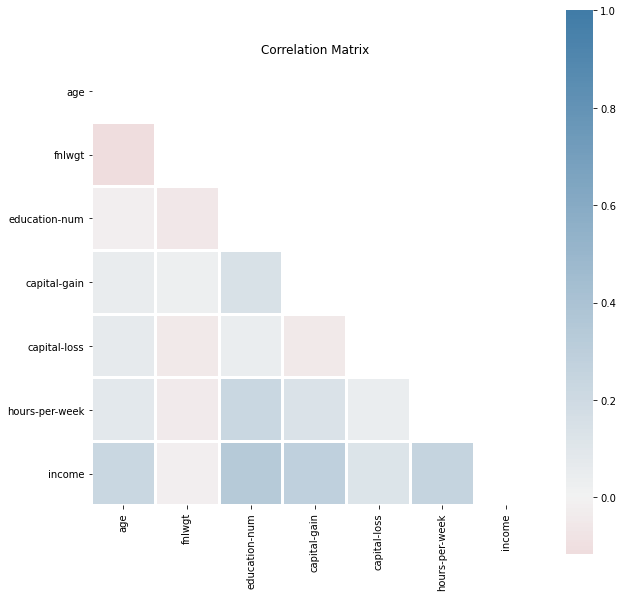

In [19]:
dd.correlation_matrix(df)

In [20]:
# We see there are many corrupt values as '?', we will replace them with null values
df.replace({' ?':np.nan},inplace=True)

In [21]:
dd.data_summary(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
Data Type,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,int64
Mean,38.051,,191905,,10.084,,,,,,588.526,92.96,39.876,,0.232
Standard Deviation,13.3495,,108126,,2.54862,,,,,,2618.54,412.442,12.0181,,0.42232
Median,36,,180590,,10,,,,,,0,0,40,,0
Min,17,,21174,,1,,,,,,0,0,1,,0
Max,90,,1033222,,16,,,,,,34095,2415,99,,1
# Zeros,0,,0,,0,,,,,,919,950,0,,768
# Nulls,0,62,0,0,0,0,62,0,0,0,0,0,0,18,0
% Most Frequent Value,3.3,69.8,0.3,32.1,32.1,44.3,12.6,37.6,84.7,67.1,91.9,95,47.2,90.2,76.8


data-describe Summary Widget

In [22]:
# Percentage of null values
100*df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]

workclass         6.2
occupation        6.2
native-country    1.8
dtype: float64

In [23]:
#imputing missing values with mode
df['workclass'].fillna(df['workclass'].mode().values[0],inplace=True)
df['occupation'].fillna(df['occupation'].mode().values[0],inplace=True)
df['native-country'].fillna(df['native-country'].mode().values[0],inplace=True)

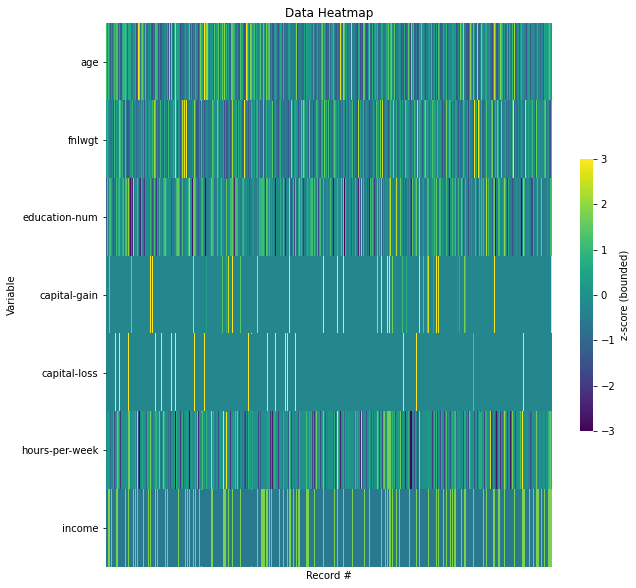

Heatmap Widget showing standardized values.

In [24]:
dd.data_heatmap(df)

data-describe Scatter Plot Widget

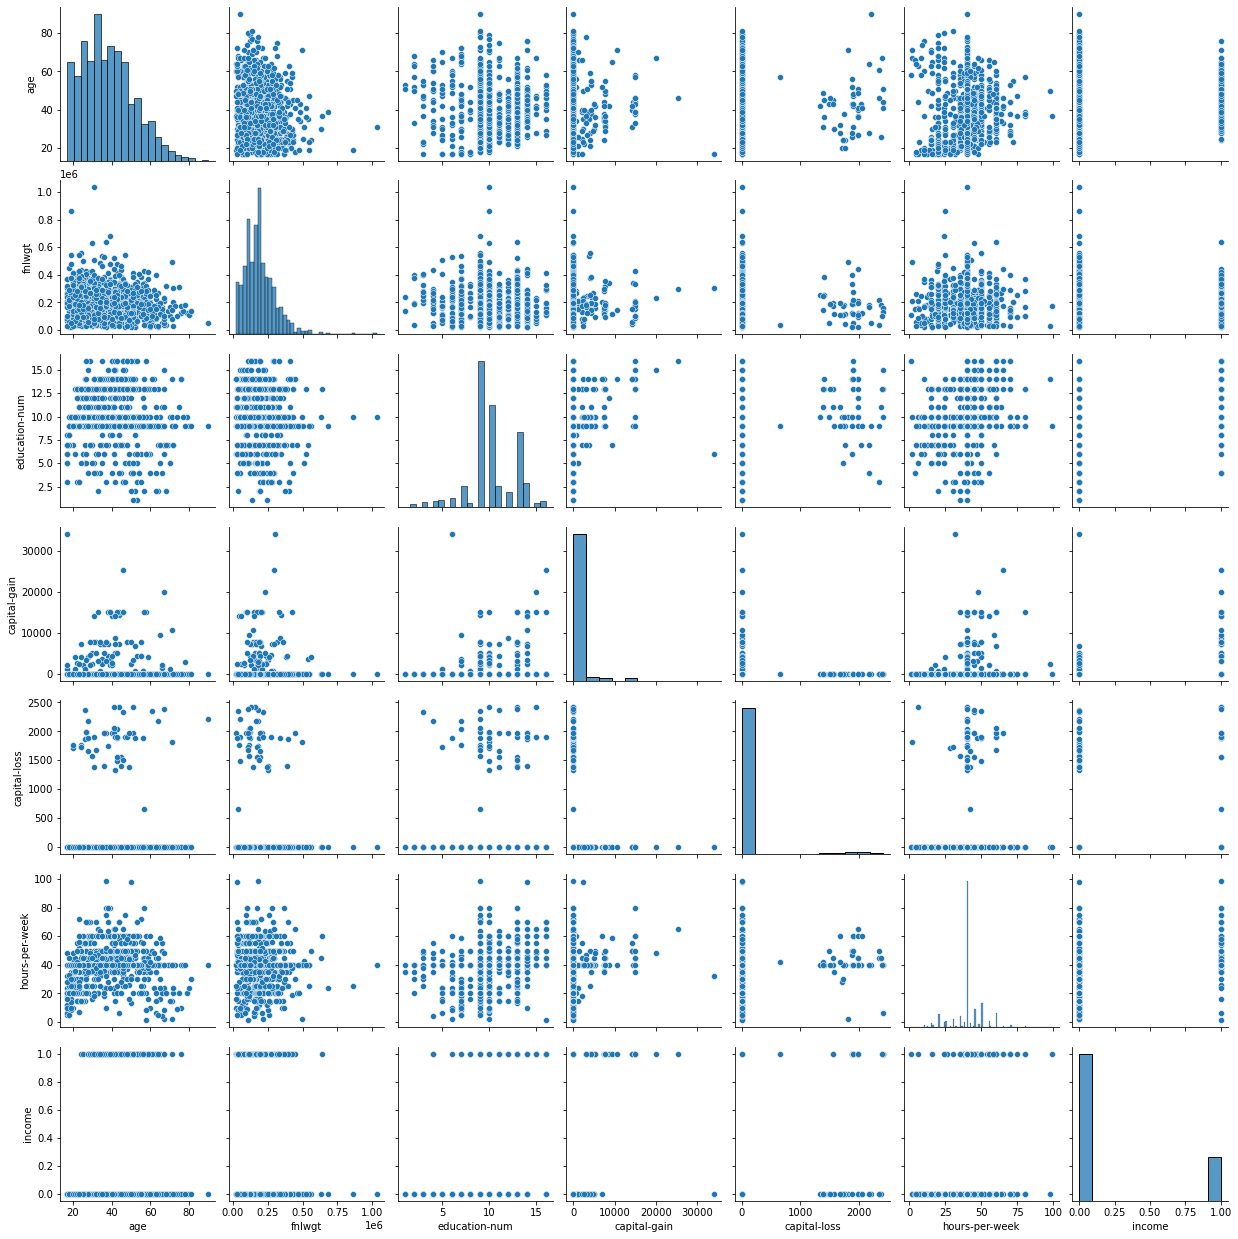

In [25]:
dd.scatter_plots(df, plot_mode='matrix')

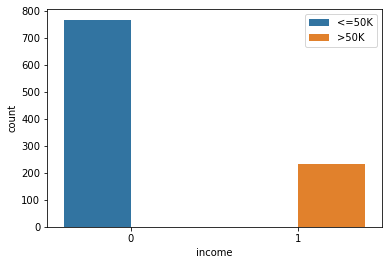

In [26]:
# We see that most of the datapoints have income less then 50K
ax= sns.countplot(data = df, x = 'income', hue='income' ) 
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )

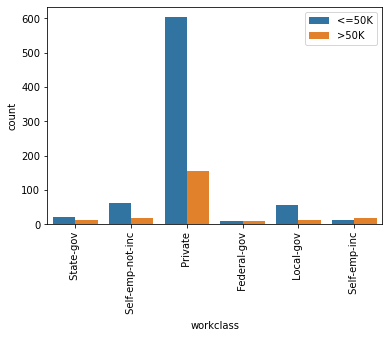

In [27]:
ax= sns.countplot(data = df, x = 'workclass' , hue = 'income')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


We see most of worksclass belong to the Private sector

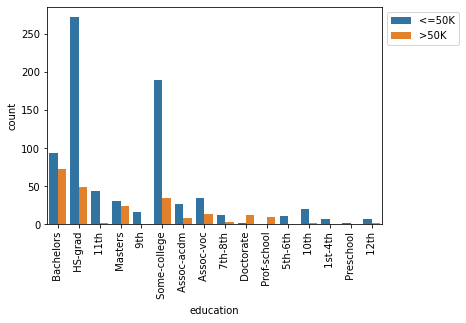

In [28]:
ax= sns.countplot(data = df, x = 'education' , hue = 'income')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


Most of the people are HS Graduates. Also higher education has more chances of having income >50K

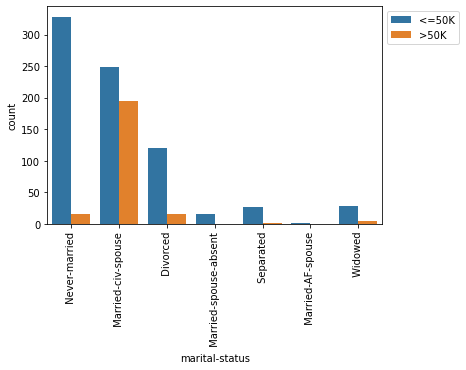

In [29]:
ax= sns.countplot(data = df, x = 'marital-status' , hue = 'income')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


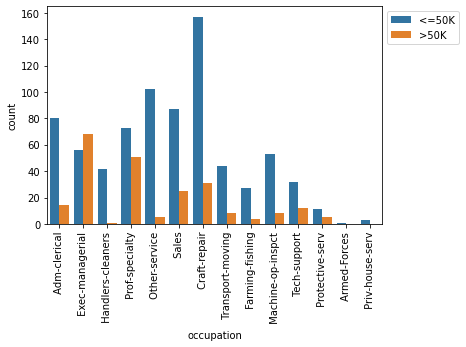

In [30]:
ax= sns.countplot(data = df, x = 'occupation' , hue = 'income')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


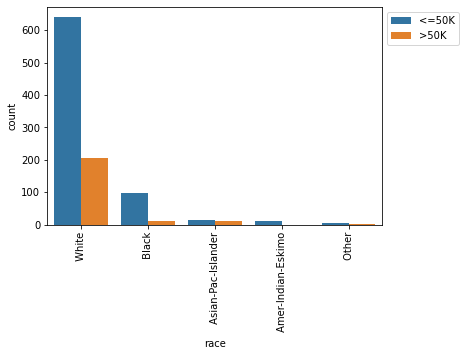

In [31]:
ax= sns.countplot(data = df, x = 'race' , hue = 'income')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


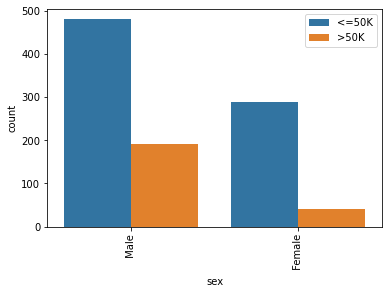

In [32]:
ax= sns.countplot(data = df, x = 'sex' , hue = 'income')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)
plt.show()


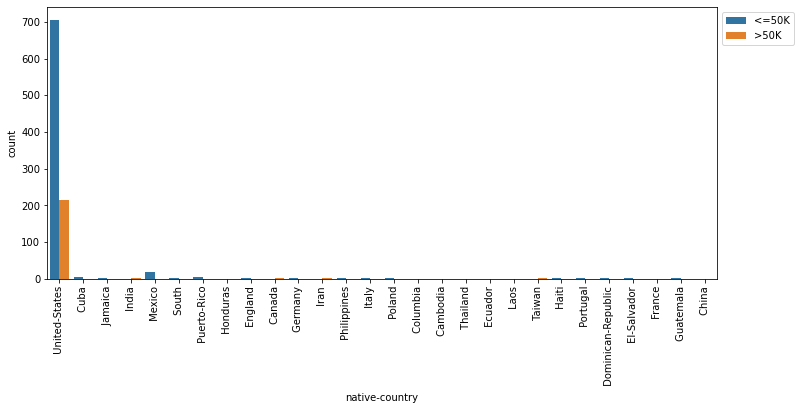

In [33]:
plt.figure(figsize=(12,5))
ax= sns.countplot(data = df, x = 'native-country' , hue = 'income')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<=50K','>50K'],
          bbox_to_anchor=(1,1)
          )
plt.xticks(rotation = 90)

plt.show()


Most of the people are from the US 

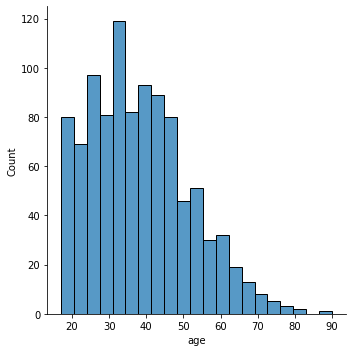

In [34]:
sns.displot(df['age'], kde = False)

More people in this data set are younger.

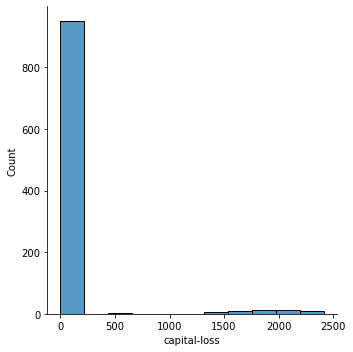

In [35]:
sns.displot(df['capital-loss'], kde = False)

We see a majority of people have no capital loss.

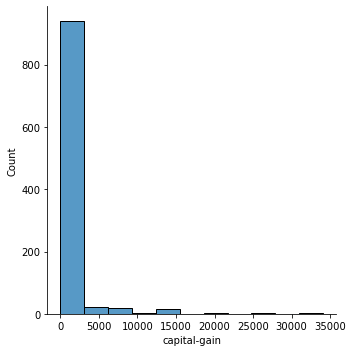

In [36]:
sns.displot(df['capital-gain'], kde = False)

Most people have zero capital gains. However there are cases, where the capital gain is very high.

In [37]:
#creating seprate dataframes for cases where the income is greater than 50K and Less than 50K
gt_50 = df[df['income']== 1]
ls_50 = df[df['income']== 0]

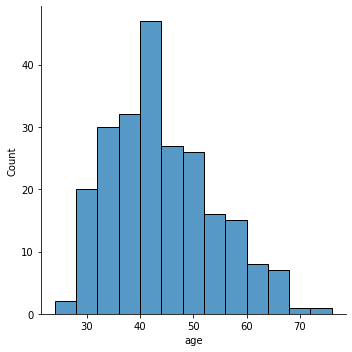

In [38]:
sns.displot(gt_50['age'], kde = False)

People with incomes >= 50K are more likely to be between 35 and 45 years of age.

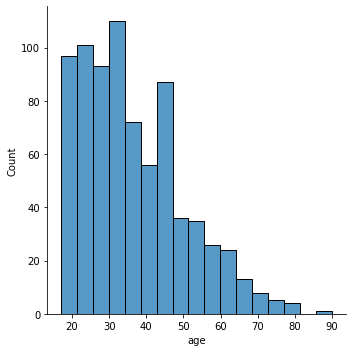

In [39]:
sns.displot(ls_50['age'], kde = False)

More people with income less than 50K are younger.

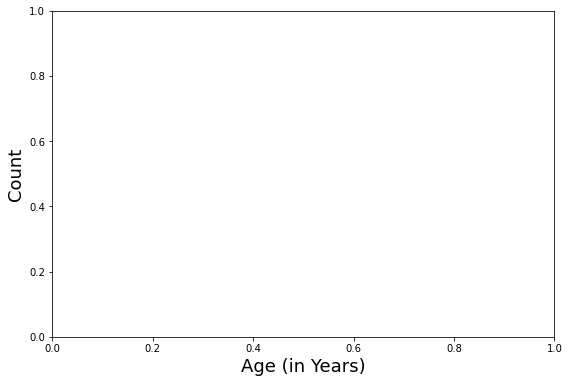

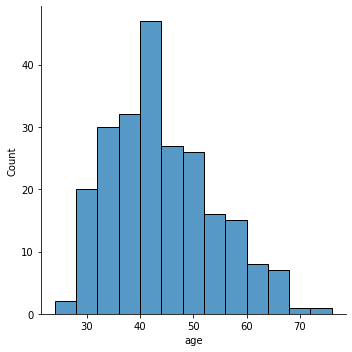

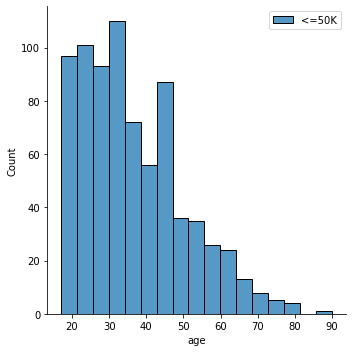

In [40]:
plt.figure(figsize=(9,6))


plt.xlabel('Age (in Years)', fontsize=18)
plt.ylabel('Count', fontsize=18)


sns.displot(gt_50['age'], kde = False, label = '>50K')
sns.displot(ls_50['age'], kde = False, label = '<=50K')
plt.legend()

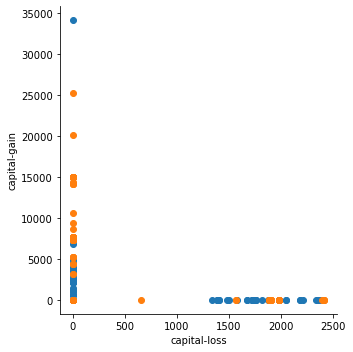

In [41]:
sns.FacetGrid(df, hue="income", height=5) \
   .map(plt.scatter, "capital-loss", "capital-gain") \
  

Capital gain and capital loss are inversely correlated.

# Correlation

<AxesSubplot:title={'center':'Correlation Matrix'}>

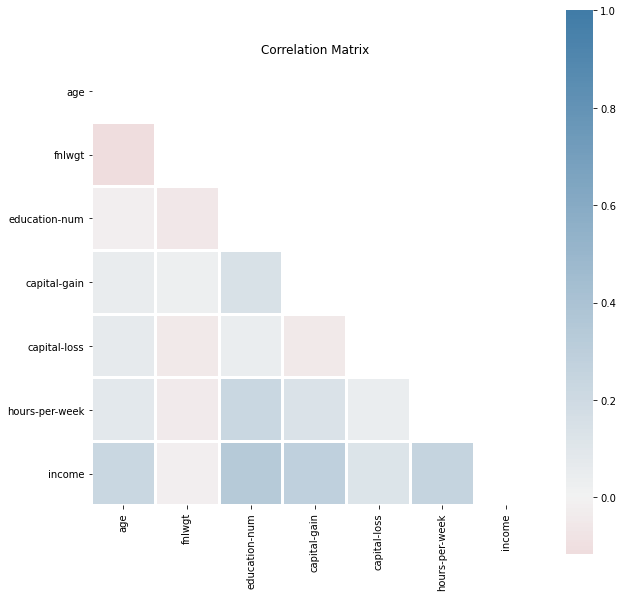

In [42]:
dd.correlation_matrix(df, cluster=False)

# Feature Importance

Text(0.5, 1.0, 'Feature Importance')

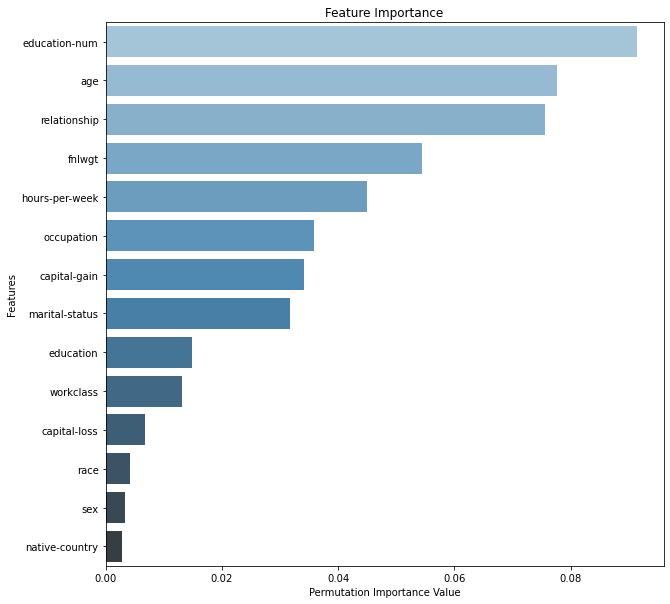

In [43]:
dd.importance(df, "income", truncate=False)

# Cluster Analysis

In [44]:
clusters = dd.cluster(df)

<AxesSubplot:title={'center':'kmeans Cluster'}, xlabel='Component 1 (25.0% variance explained)', ylabel='Component 2 (16.0% variance explained)'>

Cluster Widget using kmeans

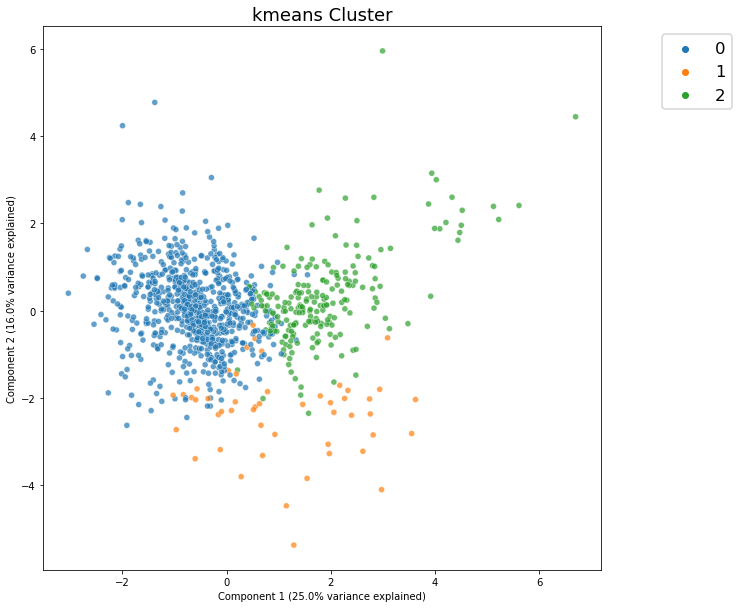

In [45]:
clusters

In [46]:
clusters.clusters

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [47]:
clusters_df = df
clusters_df['cluster'] = clusters.clusters

In [48]:
clusters_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0


## Cluster Profiling

In [49]:
dd.data_summary(clusters_df.loc[clusters_df.cluster == 0])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
Data Type,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,int64,int32
Mean,36.25,,193731,,9.6019,,,,,,121.548,0,37.9688,,0,0
Standard Deviation,13.6943,,112069,,2.37572,,,,,,627.748,0,11.6867,,0,0
Median,34,,179530,,9,,,,,,0,0,40,,0,0
Min,17,,21906,,1,,,,,,0,0,2,,0,0
Max,81,,1033222,,16,,,,,,5013,0,80,,0,0
# Zeros,0,,0,,0,,,,,,703,736,0,,736,736
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,4.08,78.4,0.27,35.87,35.87,42.8,20.24,32.47,83.56,62.36,95.52,100,47.42,91.98,100,100


data-describe Summary Widget

In [50]:
dd.data_summary(clusters_df.loc[clusters_df.cluster == 1])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
Data Type,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,int64,int32
Mean,41.1633,,171584,,10.6531,,,,,,0,1883.82,42.2857,,0.428571,1
Standard Deviation,13.9588,,103313,,2.93365,,,,,,0,298.059,11.1056,,0.5,0
Median,42,,162028,,10,,,,,,0,1902,40,,0,1
Min,20,,22463,,3,,,,,,0,1340,2,,0,1
Max,90,,494223,,16,,,,,,0,2415,65,,1,1
# Zeros,0,,0,,0,,,,,,49,0,0,,28,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,10.2,81.63,2.04,20.41,20.41,55.1,20.41,42.86,83.67,69.39,100,12.24,51.02,83.67,57.14,100


data-describe Summary Widget

In [51]:
dd.data_summary(clusters_df.loc[clusters_df.cluster == 2])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
Data Type,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,int64,int32
Mean,43.507,,190286,,11.6047,,,,,,2321.24,3.03721,45.8558,,0.981395,2
Standard Deviation,10.0414,,94540.8,,2.41045,,,,,,5177.81,44.5342,11.3018,,0.135439,0
Median,42,,186556,,13,,,,,,0,0,40,,1,2
Min,17,,21174,,4,,,,,,0,0,1,,0,2
Max,76,,635913,,16,,,,,,34095,653,99,,1,2
# Zeros,0,,0,,0,,,,,,167,214,0,,4,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,6.51,66.51,0.93,32.09,32.09,82.79,28.84,72.56,88.84,82.79,77.67,99.53,45.58,93.95,98.14,100


data-describe Summary Widget